# Genetic Variation Across a Popoluation

In genomics, we would like to observe the genetic drift of populations over time. This drift may be due to various reaons, from environmental pressure, natural selection, or random mutational chance. An example of genetic drift is the island dwarfism of organisms isolated in areas with limited resources.

In this simulation, we learn a way to quantify the distribution of DNA across the population. The population will undergo self-breeding and we will observe how this distribution changes.

***

The organisms in this case will be modelled as a string of base pairs, `"ATCGTGAC"`. The population will then be a list of fixed length containing these strings, each representing an individual. 

Every breeding cycle, the gene pool will be mixed. 

Two individuals will be randomly selected, and their genes mixed in order to produce a new organism. A small mutation rate will be included as part of this breeding process. This process is repeated until we obtain enough individuals for the next generation of the population, and the old population is discarded. 

The distribution of genes will then be calculated at each breeding cycle. This distribution is given by the informational entropy of the base across the population (explaination below).

The workflow will be as follows:
1. Initialise the population of random genes
2. For each breeding cycle\
    a. Pick two individuals, and mix their DNA (with some mutations)\
    b. Add this offspring to a new population\
    c. Repeat until the size of the new population matches the old population\
    d. Find the distribution (entropy) of genomes
3. Trace how this distribution (entropy) evolves with time

# Sample Simulation

We will start by making a small simulation to test how it works

## Libraries

First, we will need to import our libraries. We will be using

1. `matplotlib.pyplot` for plotting
2. `numpy` for their random library

In [242]:
import matplotlib.pyplot as plt
import numpy as np

## Initial Variables

Let's define a variable `bases` to hold the different bases we can find in organisms. This will be a tuple.

A variable `DNA_length` will also be defined to hold the length of the genome we want for our simulation. This is important as all organisms should have the same number of bases (same DNA length).

We will also add a base mutation rate, `mutation_rate`, which introduces a random change to the base during breeding.

A variable `popln_size` will be defined to hold the size of our population.

In [227]:
bases = "A", "T", "C", "G"          # Default DNA base pairs

DNA_length = 50                     # Fixed DNA length for all individuals
mutation_rate = 0.01                # Fixed mutation rate (1%)

popln_size = 50                     # Size of test population

## Functions

Next, we define the functions we will need in our simulation.

### New Organism

We define a function to create a brand new organism from scratch for us. It will take in no arguments, and return a string (DNA of organism).

This will come in handy when we have to make a lot of starting organisms as our experimental population.

In [228]:
def make_organism():                    # Takes in no arguments
    DNA = ""                            # Initialise a variable to hold the new 
                                        # DNA sequence

    for base in range(DNA_length):      # For each base pair in the sequence
                                        # We add a random new base
        DNA = DNA + bases[np.random.randint(4)]

    return DNA                          # Return this compiled DNA sequence

Let's test it! We make a test organism, `Adam`.

In [229]:
adam = make_organism()
adam

'GTCACAGGCATCGTTTTAATGAAACGAATACCTGCCGGCTGTAGGCTCGC'

### Breeding

Now we make a function that breeds two organisms together. It will take in two strings (the two organism DNAs) and return a string (the offspring's DNA).

It will go down both genomes, and randomly pick one base to add to the new sequence. It will also introduce a chance to randomly mutating the base into another, using the mutation rate defined earlier.

In [230]:
def breed(organism1, organism2):                    # Takes in two organisms 
                                                    # (strings)
    new_DNA = ""                                    # Initialise a variable to 
                                                    # hold the offsping's DNA

    for base in range(DNA_length):                  # Going over the DNA length
                                                    # Checks if there's mutation
        mutation = (np.random.random() <= mutation_rate)
        # Makes a random number 0<x<1, and checks if it is lesser than
        # the mutation rate, x < 0.01. This is either true or false

        if mutation is True:                        # If there is a mutation
                                                    # Insert a random base
            new_DNA = new_DNA + bases[np.random.randint(4)]
        else:                                       # Otherwise,
            random_choice = np.random.randint(2)    # Pick a random parent by 0 or 1

            if random_choice == 0:                  # If chosen parent 0
                new_DNA = new_DNA + organism1[base] # add their base

            elif random_choice == 1:                # If chosen parent 1
                new_DNA = new_DNA + organism2[base] # Add their base

    return new_DNA          # Return the offspring DNA

Let's test it! We make a new test organism, `Eve`, and have her breed with `Adam`.

In [231]:
eve = make_organism()
eve

'TGAAACTATACCTCGAGGCCACGGTCAGACGATGAAGCAGAGTCAAACTG'

We breed them, and find their offspring `Cain`'s DNA.

In [232]:
cain = breed(adam,eve)
cain

'GGCAACTACACCGCGTGAACGCGGTCAATAGCTGACGCCGGGTGGAACGG'

### Genome Distribution

Next, we want a function that will test the similarity between the genomes of the population. It will iterate over each base pair, and observe the differences across the population. The differences will be given by the informational content/entropy across the base.

The entropy is given by the formula

$$
H = \sum_\mathrm{values} -p(\mathrm{value}) \log_2[p(\mathrm{value})]
$$

where $p(\mathrm{value})$ is the probability of having the value. In this case, this is found by finding the number of occurances of each base, and dividing by the number of individuals in the population.

The higher the entropy, the more variation in the base pairs. The lower the entropy, the greater the similarity across organisms.

***

**Example**

For example, consider a population of individuals with DNA sequences

* Alice = "ABCD"
* Bob = "ABCD"
* Carol = "BBCD"

We look at the first base pair, and find that they are distributed as  `["A", "A", "B"]`. We can find the entropy as

\begin{align}
H_1 
&= - p(``A") \log_2[p(``A")] - p(``B") \log_2[p(``B")] \\
&= - \frac{2}{3} \log_2\left[\frac{2}{3}\right] - \frac{1}{3} \log_2\left[\frac{1}{3}\right] \\
&= 0.918
\end{align}

Finding the entropy across the other base pairs, we find that

$$
H_2 = -p(``B") \log_2[p(``B")] = 0
$$

and likewise for the third and fourth base pairs, $H_3 = H_4 = 0$. Thus, we have the total entropy

$$
H_T = H_1 + H_2 + H_3 + H_4 = 0.918
$$

***

First, let's make a function to calculate the entropy for us. It will take in a list (or tuple) and return a float. 

We will use a dictionary to assign a variable to its count, e.g., `{"A": 5, "B": 10, "C": 1}`. A dictionary is a collection of items, which are organised as {key: value, $\cdots$}. This allows us to assign a count (value) to each word (key). This will then be used to find the entropy

In [233]:
def entropy(distribution):              # List of bases across the population
    counts = {}                         # Dictionary to hold counts
    total_counts = len(distribution)    # Total population size

    for i in distribution:              # Iterating over the distribution
        if i in counts:                 # check if the base is in the dictionary
            counts[i] = counts[i] + 1   # if so, we add 1 to the current count
        else:                           # if it isn't inside
            counts[i] = 1               # we initiallise it with a count of 1
    
    H = 0                               # Define a variable to hold the entropy

    for key,value in counts.items():    # iterating over the dictionary
                                        # We find the probability of the base
        probability = value/total_counts
                                        # and sum the entropy up with the above formula
        H = H - probability * np.log2(probability)
    
    return H                            # Finally, we return the entropy

Now, we make a function that finds the total entropy across the whole population. It will take in a list of strings (population DNAs) and return a float number.

It will iterate through the length of the DNA, collecting the population distribution of base pairs at each base, and find the entropy. The entropy is then all added up.

In [234]:
def genome_entropy(popln):              # Takes in a list of DNAs
    overall_entropy = 0                 # Define a variable for the total entropy

    for base in range(DNA_length):      # Going down the DNA length,
                                        # We will compile the bases at each step
                                        # A list is defined to compile the bases
        list_of_bases = [] 

                                        # Iterate over the population
        for organism in popln:
                                        # Append the individual's base to the list
            list_of_bases.append(organism[base])
        
                                        # Use our earlier function to find the 
                                        # entropy for this step in the DNA
        base_entropy = entropy(list_of_bases)

                                        # Add to our total entropy
        overall_entropy += base_entropy
        
                                        # Return the total entropy
    return overall_entropy

Let's test it! We compare the genome similarity between our test organisms. We will expect a higher similarity between parent and child, compared to the two parents.

In [235]:
adam_eve = genome_entropy((adam,eve))
print("Difference between genomes of Adam and Eve: ", adam_eve, sep = "")

adam_cain = genome_entropy((adam,cain))
print("Difference between genomes of Adam and Cain: ", adam_cain, sep = "")

eve_cain = genome_entropy((eve, cain))
print("Difference between genomes of Eve and Cain: ", eve_cain, sep = "")

Difference between genomes of Adam and Eve: 42.0
Difference between genomes of Adam and Cain: 24.0
Difference between genomes of Eve and Cain: 18.0


As expected, the difference between `Adam` and `Eve` is larger than either with `Cain`.

# Simulation

We will now run the actual simulation. All the pieces are in place to make the actual simulation.

First, we will define a list to hold all the DNA sequences of our population, and populate it.

In [236]:
popln_DNA = []                          # List of everyone's DNA

for individual in range(popln_size):    # For each individual,
    new_indiv = make_organism()         # make their DNA randomly

    popln_DNA.append(new_indiv)         # Add them to the population

Let's take a look.

In [237]:
popln_DNA

['CTAGGACGGTTGGGCTTTAGGGTCATTACCCCTTACTTAAACAACGAGGT',
 'ACGGGTTGATATAGAGCCTTGCTTAAGGATCAAGCGTTGCCACAGAGGTA',
 'GCTCCAGCCAGTCCGGGTTCCTTCCTGGACAATCTGCACCCAGTTGATAA',
 'GTCGCATATAGGGTAAGAGATATACACCCCCCGAGTCCACTATAACCGGC',
 'CGCATGCGTATTCGACGACCGTGCTCACTGTCCTTTACGGACGCATATCT',
 'ACTTTCAGCTCCTTTTGCTTAAAACCAAGGCTCCGCGTAACCTTCTTTCC',
 'ACTATGGCGTCGCGTGGGATCACTCTCCCAAGCGAGCAAAACCGTAGCCC',
 'GGGTGGACGATCCACTCAATAAGGGGATTTGGTTATACAATGAGGTCTAA',
 'ATCCTCGCGCAGACTACCGTCCGTTTCGAATTTTCACTGCATTGCTGACC',
 'AAGGTAGCATCGACGGTTTTCATCCGATACGTCCCATGCATTGCAACTTC',
 'ATACCACCCCTGCCTACATGGACACGCCTTTACGTAGTTACACCGCGGTA',
 'AATGACCATTTTCATCTATTATCTTCAGGTGTACGCGTCGCCCCAAGTCA',
 'CGTGATTATCACAGGCCGGAATCTTACAGCCGGGGGCCTCACACGCATGC',
 'GTTGTCTCACGCTGTAGCATCAGAAGTGATTGCGCCCCAAAGGAGGGTAT',
 'ACGTTGCAGAGGGAGTTAGCACTACATTATACAGCGGATCGAAGATAGAT',
 'GGGCCACGACCTTGACCGGGTCCTGCGTTTGTATGCAATACCTGCAGGCA',
 'CCGAGACCGCAGCCTTATCAAACGTATTAACGGGTCGTCCTCACGGGTCT',
 'ACAACGGCATGCGATAAGCCCCTAACCGGACGTCATTTATCCGGCGGAGT',
 'TCACGTCA

We also want a list to hold our total population entropy, so that we can see how it changes with time.

In [238]:
popln_entropy = []

Finally, we want to define how many breeding cycles we are interested in. For now, we set `num_cycles = 100`.

In [239]:
num_cycles = 100

Now let's run our simulation. We will use a `for`-loop, and iterate `num_cycle = 100` times. 

At each step, we will find the entropy, and add it to our population entropy list. We will then breed the population, and repeat the cycle.

In [240]:
for cycle in range(num_cycles):                     # For each cycle
    current_entropy = genome_entropy(popln_DNA)     # We find the entropy of 
                                                    # their genome
    popln_entropy.append(current_entropy)           # and add it to the list

    next_generation = []                    # Defining a variable to hold
                                            # the DNA of the next generation

    while len(next_generation) < popln_size:    # While the new generation is 
                                                # still too small,

                                                # We choose two individuals to
                                                # make an offspring
        parent1, parent2 = np.random.choice(popln_DNA, 2)

                                                # We breed them, and take their kid
        offspring = breed(parent1, parent2)

                                                # and add their offspring to the
                                                # next generation
        next_generation.append(offspring)
    
    # We now replace the old generation with the new one
    popln_DNA = next_generation

## Plotting Results

We can now take a look at how the genome of the population changes over time. 

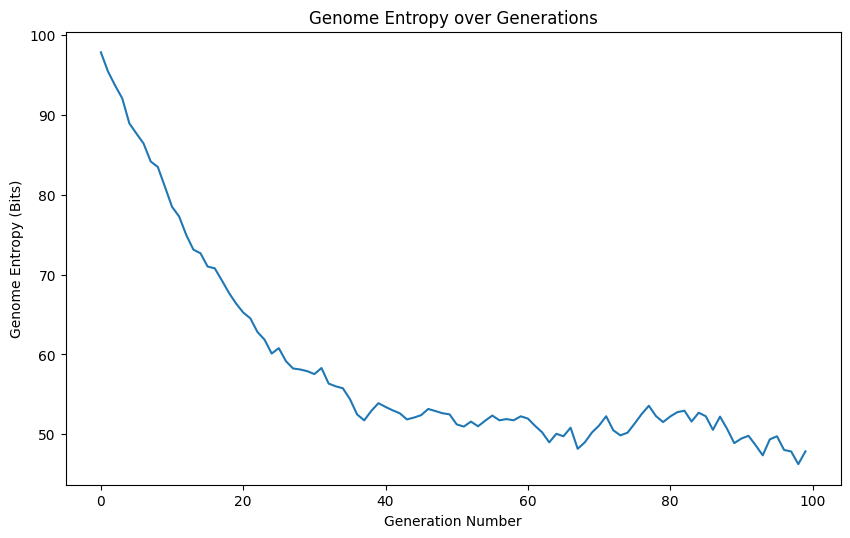

In [241]:
plt.figure(figsize = (10,6), dpi = 100)         # Change resolution of figure

plt.plot(popln_entropy)                         # Plots the figure

plt.title("Genome Entropy over Generations")    # Changes figure labels
plt.xlabel("Generation Number")
plt.ylabel("Genome Entropy (Bits)")

plt.show()                                      # Prints the figures

We can see that after a while, the population converges and the differences between the genes of the population falls. This is due to interbreeding causing the gene pool to converge.

We can see that there are also fluctuations in the gene pool. This is the mutation factor at work, causing small changes in the gene pool.

However, we can see that at some point, the entropy begins rising again. This is due to natural genetic drift - once the popuation stabilises, any genetic mutation that is not detrimental will not be selected against. In our simple model, all mutations are equal, hence the gene pool begins diverging again.

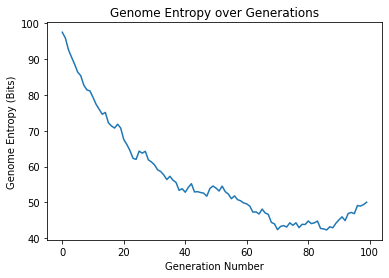

# Extensions

Consider playing around with the variables in the model, and see how do they affect the genetic variation in the population, e.g., add more bases, what happens over longer time frames, etc.

You may also consider how two genomically similar populations diverge over time, similar how insular dwarfism occors.

Further, you can consider how poor mutations may be selected for or against, and see how the effects of incest and debihilitate a population.